<a href="https://colab.research.google.com/github/Akshay-Naik234/Titanic_data_analysis/blob/master/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importing Required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Read the dataset
data = pd.read_csv('train.csv')

In [10]:
#To display how many null values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#To display the top 10 rows
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
#To know the min and max age of people
data['Age'].min(),data['Age'].max()

(0.42, 80.0)

In [13]:
#To know the shape of dataset
data.shape

(891, 12)

In [14]:
#To display the non-null of each column and it's datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Since thecabin table is having lot of null values so drop the Cabin column
data = data.drop(['Cabin'],axis=1)

In [16]:
#After Droping the Cabin column the dataset will look like this
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [18]:
#To check how many duplicated  rows are present in dataset
duplicated_rows = data[data.duplicated()]
print("number of  duplicated rows ",duplicated_rows.shape)

number of  duplicated rows  (0, 11)


In [19]:
#Replacing the null values by median 
p = data['Age'].median()
data['Age'].fillna(p,inplace=True)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
#Replacing null values by most frequently occured 
imp = SimpleImputer(strategy='most_frequent')
data[['Embarked']] =imp.fit_transform(data[['Embarked']])

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# Since the passengerId,name and ticket is not make difference in the accuracy so droping that table
data = data.drop(['PassengerId','Name','Ticket'],axis=1)

In [24]:
data.shape

(891, 8)

In [25]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
#To display the count of survived and non survived people
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
#To display the percentage of survived and non survived people
data['Survived'].value_counts() * 100 /len(data['Survived'])

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [28]:
#To display the count of male and female
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
#To display the count of people traveled in each class
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

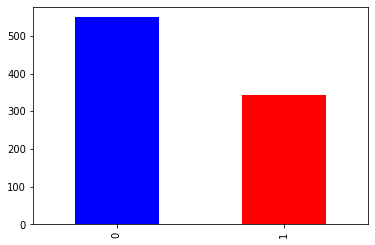

In [30]:
alpha_color = 0.5
data['Survived'].value_counts().plot(kind='bar',color=['b','r'])

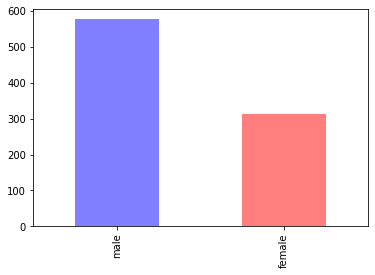

In [31]:
data['Sex'].value_counts().plot(kind='bar',color=['b','r'],alpha = alpha_color)

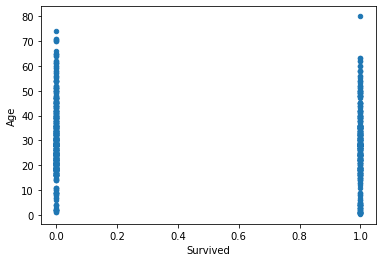

In [32]:
#ploting age vs survived graph using scatter plot
data.plot(kind='scatter',x = 'Survived',y='Age')

In [33]:
#create a column with name AgeBin with a range
bins = [0,10,20,30,40,50,60,70,80]
data['AgeBin'] = pd.cut(data['Age'],bins)

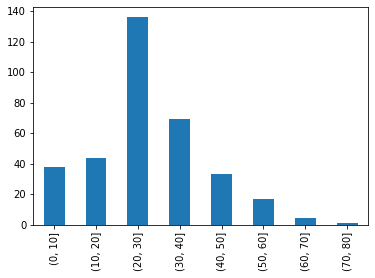

In [34]:
#ploting the graph of survived people vs AgeBin using barplot
data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

From the above graph we see that majority of survived people belongs to age range of 20-30

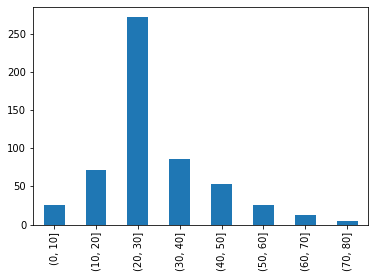

In [35]:
#ploting the graph of died people vs AgeBin using barplot
data[data['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

From the above graph we see that majority of died people belongs to age range of 20-30

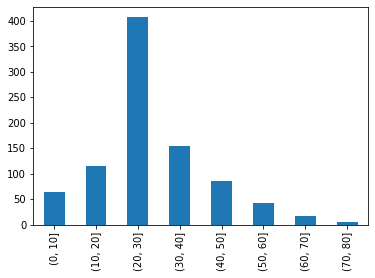

In [36]:
data['AgeBin'].value_counts().sort_index().plot(kind='bar')

Above graph shows that majority of people belongs to 20-30 range age

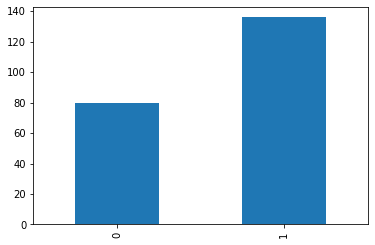

In [37]:
#To display how many people are survived and died in the pclass 1
data[data['Pclass'] == 1]['Survived'].value_counts().sort_index().plot(kind='bar')

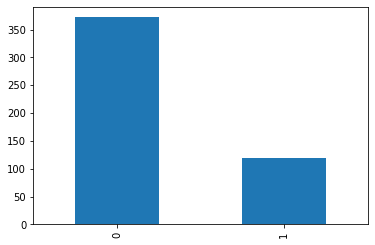

In [38]:
#To display how many people are survived and died in the pclass 3
data[data['Pclass'] == 3]['Survived'].value_counts().sort_index().plot(kind='bar')

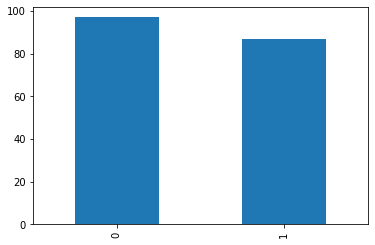

In [39]:
#To display how many people are survived and died in the pclass 2
data[data['Pclass'] == 2]['Survived'].value_counts().sort_index().plot(kind='bar')

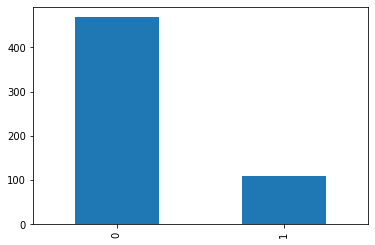

In [40]:
#To display how many male survived and died in the train
data[data['Sex'] == 'male']['Survived'].value_counts().sort_index().plot(kind='bar')

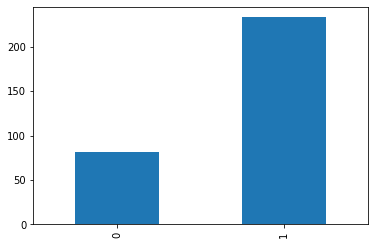

In [41]:
#To display how many female survived and died in the train
data[data['Sex'] == 'female']['Survived'].value_counts().sort_index().plot(kind='bar')

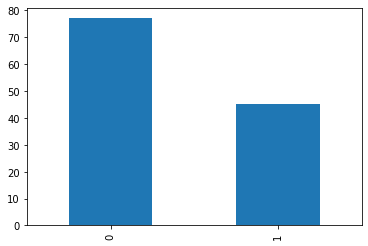

In [42]:
#To display how many count of male belongs to pclass1 and survived and died
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().sort_index().plot(kind='bar')

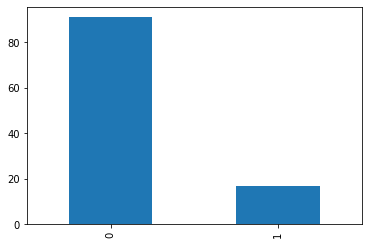

In [43]:
#To display how many count of male belongs to pclass2 and survived and died
data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Survived'].value_counts().sort_index().plot(kind='bar')

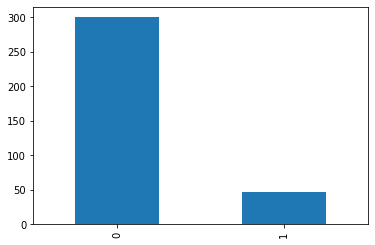

In [44]:
#To display how many count of male belongs to pclass3 and survived and died
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().sort_index().plot(kind='bar')

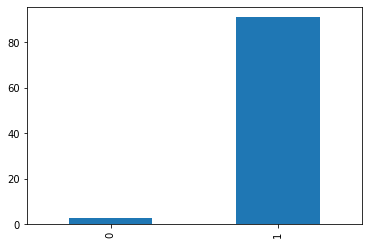

In [45]:
#To display how many count of female belongs to pclass1 and survived and died
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().sort_index().plot(kind='bar')

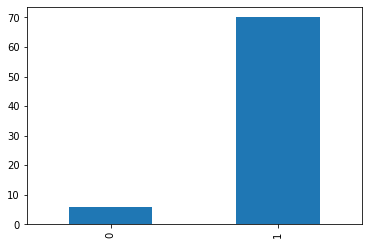

In [46]:
#To display how many count of female belongs to pclass2 and survived and died
data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Survived'].value_counts().sort_index().plot(kind='bar')

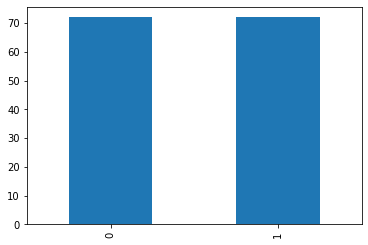

In [47]:
#To display how many count of female belongs to pclass3 and survived and died
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().sort_index().plot(kind='bar')

In [48]:
#Average age of female survived
data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Age'].mean()

28.716738197424892

In [49]:
#Average age of female died
data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Age'].mean()

25.666666666666668

In [50]:
#Average age of male survived
data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Age'].mean()

27.382293577981653

In [51]:
#Average age of male died
data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age'].mean()

30.78311965811966

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


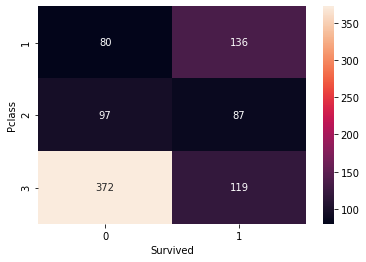

In [52]:
#Group the dataset by Pclass and survived class then unstack them
group = data.groupby(['Pclass','Survived'])
p_s = group.size().unstack()
#Representation of heatmap
sns.heatmap(p_s,annot = True,fmt="d")
print(group.size())

In [53]:
#Group the dataset by Pclass and survived class and sex then unstack them
group = data.groupby(['Pclass','Survived','Sex'])
p_s = group.size().unstack()
print(p_s)

Sex              female  male
Pclass Survived              
1      0              3    77
       1             91    45
2      0              6    91
       1             70    17
3      0             72   300
       1             72    47


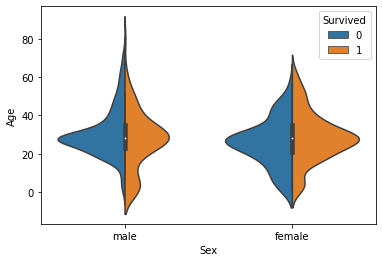

In [54]:
#Violinplot displays a distribution of data across all level of a category
sns.violinplot(x="Sex",y="Age",hue="Survived",data=data,split=True)

In [55]:
#Adding a column Family_size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']


In [56]:
#Adding column Alone
data['Alone'] = 0
data.loc[data.Family_Size == 0,'Alone'] = 1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


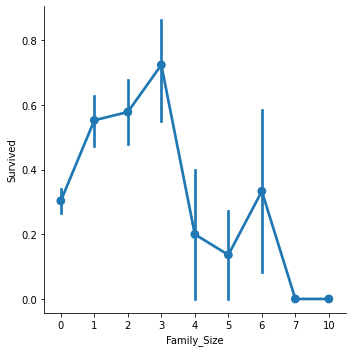

In [57]:
#Representation of Family_Size vs Survived using factorplot
sns.factorplot(x='Family_Size',y='Survived',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


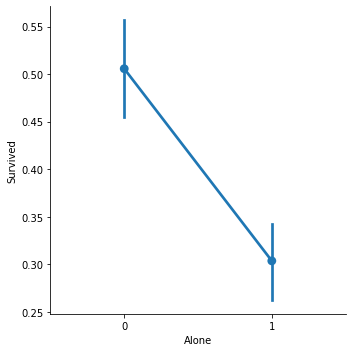

In [58]:
#Representation of Alone vs Survived using factorplot
sns.factorplot(x='Alone',y='Survived',data=data)

In [59]:
#Divide Fare into 4 bins
data['Fare_range'] = pd.qcut(data['Fare'],4)

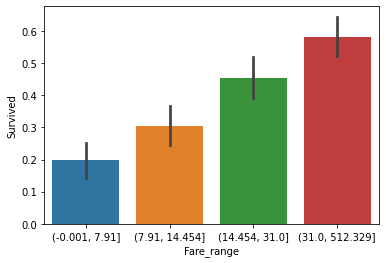

In [60]:
sns.barplot(x='Fare_range',y='Survived',data=data)

In [61]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin,Family_Size,Alone,Fare_range
0,0,3,male,22.0,1,0,7.2500,S,"(20, 30]",1,0,"(-0.001, 7.91]"
1,1,1,female,38.0,1,0,71.2833,C,"(30, 40]",1,0,"(31.0, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,"(20, 30]",0,1,"(7.91, 14.454]"
3,1,1,female,35.0,1,0,53.1000,S,"(30, 40]",1,0,"(31.0, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,"(30, 40]",0,1,"(7.91, 14.454]"


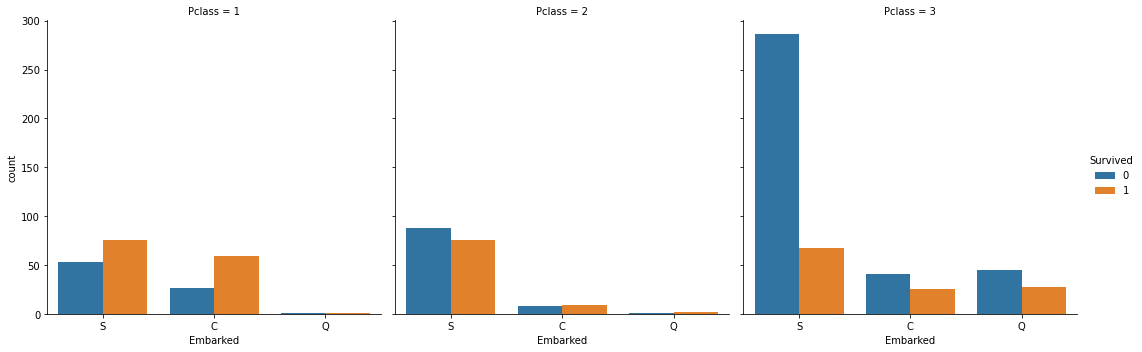

In [62]:
sns.catplot(x = 'Embarked',hue='Survived',kind='count',col='Pclass',data=data)

In [63]:
#Coverting string category into binary vector
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Embarked']=labelencoder.fit_transform(data['Embarked'])

In [64]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin,Family_Size,Alone,Fare_range
0,0,3,1,22.0,1,0,7.2500,2,"(20, 30]",1,0,"(-0.001, 7.91]"
1,1,1,0,38.0,1,0,71.2833,0,"(30, 40]",1,0,"(31.0, 512.329]"
2,1,3,0,26.0,0,0,7.9250,2,"(20, 30]",0,1,"(7.91, 14.454]"
3,1,1,0,35.0,1,0,53.1000,2,"(30, 40]",1,0,"(31.0, 512.329]"
4,0,3,1,35.0,0,0,8.0500,2,"(30, 40]",0,1,"(7.91, 14.454]"


In [65]:
#Correlation matrix between each atributes
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639,-0.203367
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997,0.135207
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.200988,0.303646
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619,0.171647
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712,-0.584471
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111,-0.583398
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138,-0.271832
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516,0.063532
Family_Size,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000,-0.690922
Alone,-0.203367,0.135207,0.303646,0.171647,-0.584471,-0.583398,-0.271832,0.063532,-0.690922,1.000000


In [66]:
x = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = data['Survived'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
#Train and test the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
#Apply the Logistic regression
m = LogisticRegression()
m.fit(x_train,y_train)
y_pred = m.predict(x_test)
m.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7988826815642458

In [71]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [72]:
f = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
f1 = f.head(15)
f1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,1


In [73]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error ",mse)

Mean squared error  0.2011173184357542
